In [8]:
import numpy as np
import os
import pandas as pd
import h5py
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from toolbox.utils import set_random_seed
from toolbox.plt_utils import density_scatter

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

In [3]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
# for TF To find gpu
os.environ["LD_LIBRARY_PATH"] = f"{os.environ['CONDA_PREFIX']}/lib:" + os.environ.get("LD_LIBRARY_PATH", "")

In [4]:
# set random seed for reproducibility
set_random_seed(seed=42)

2025-12-07 14:29:41.525351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/valehvpa/miniconda3/envs/hist6/lib:/usr/local/cuda/lib64:/usr/local/cuda/lib64
2025-12-07 14:29:41.525373: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TensorFlow not installed, skipping tf seeding.


Seed set to 42


# Debug model training

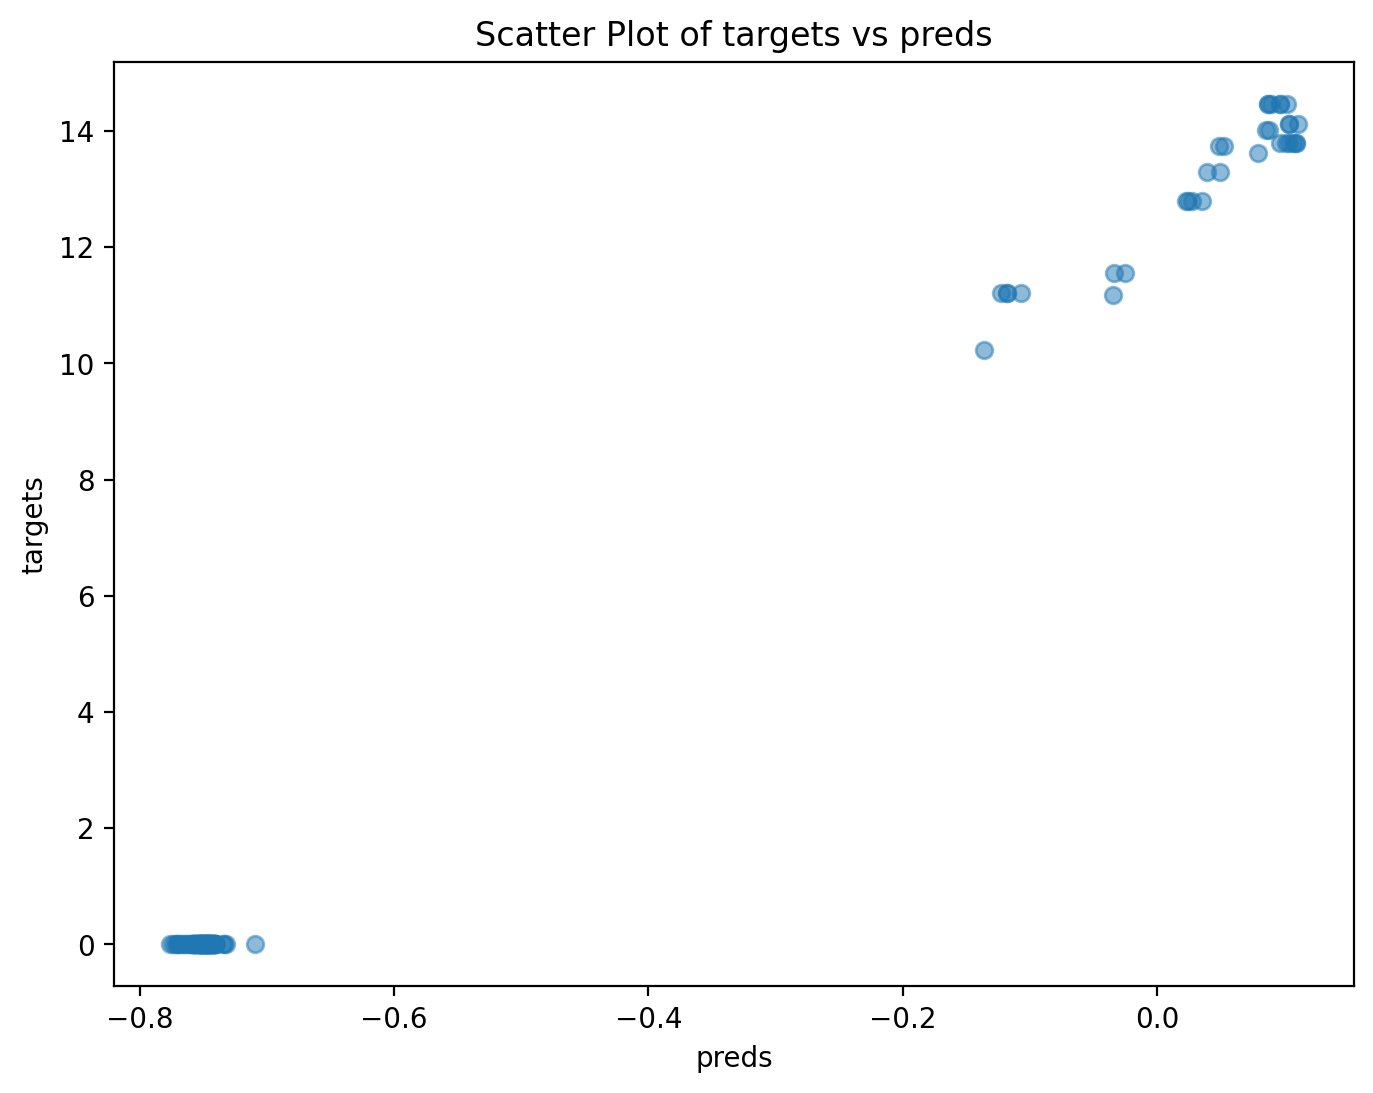

Pearson correlation: 0.99910497899927
Spearman correlation: 0.7729004953637979
mean of x: -0.54019140625
mean of y: 3.50072578125
Covariance: 2.0555638281378172
Standard deviation of x: 0.3513927481348647
Standard deviation of y: 5.8550020168688635


In [ ]:
# x = tensor([-0.7414, -0.7516, -0.7470, -0.7537, -0.7574, -0.1360, -0.7649, -0.7476,
#         -0.7512, -0.7468, -0.7477, -0.7534, -0.7456, -0.7427, -0.7590, -0.7474,
#         -0.7467,  0.0873,  0.0966,  0.0894,  0.0969,  0.0870,  0.1023,  0.0794,
#         -0.7423, -0.7486,  0.0394,  0.0499, -0.7442, -0.7405,  0.1039,  0.1105,
#          0.1040, -0.7339, -0.7346, -0.7509, -0.0339, -0.7497, -0.7445, -0.7480,
#         -0.7461,  0.0856,  0.0882, -0.7453, -0.0343, -0.7530, -0.7564, -0.7476,
#         -0.7417, -0.7546, -0.7565,  0.1070,  0.1093,  0.1095,  0.1035,  0.0966,
#          0.1016, -0.7541, -0.7501, -0.7410, -0.7527,  0.0224,  0.0272,  0.0243,
#          0.0354, -0.0254, -0.7524, -0.7514, -0.7546, -0.7489, -0.7509, -0.7697,
#         -0.7489, -0.7705, -0.7402, -0.1177, -0.1070, -0.7597, -0.7453, -0.1230,
#         -0.1177, -0.7452, -0.7439, -0.7555, -0.7486, -0.7527, -0.7428, -0.7429,
#         -0.7502, -0.7419, -0.7565, -0.7408, -0.7433, -0.7463, -0.7758, -0.7710,
#         -0.7740, -0.7461, -0.7586, -0.7520, -0.7461, -0.7427, -0.7500, -0.7409,
#         -0.7323, -0.7486, -0.7685, -0.7655, -0.7523, -0.7455, -0.7093, -0.7579,
#         -0.7482, -0.7542, -0.7445, -0.7537, -0.7626, -0.7560,  0.0525,  0.0486,
#         -0.7505, -0.7481, -0.7617, -0.7505, -0.7513, -0.7583, -0.7443, -0.7433],
#        device='cuda:0')
# all_targets
# tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 10.2380,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000, 14.4555, 14.4555, 14.4555, 14.4555, 14.4555, 14.4555, 13.6248,
#          0.0000,  0.0000, 13.2942, 13.2942,  0.0000,  0.0000, 14.1254, 14.1254,
#         14.1254,  0.0000,  0.0000,  0.0000, 11.5539,  0.0000,  0.0000,  0.0000,
#          0.0000, 14.0129, 14.0129,  0.0000, 11.1746,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000, 13.7943, 13.7943, 13.7943, 13.7943, 13.7943,
#         13.7943,  0.0000,  0.0000,  0.0000,  0.0000, 12.7861, 12.7861, 12.7861,
#         12.7861, 11.5516,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000, 11.2071, 11.2071,  0.0000,  0.0000, 11.2071,
#         11.2071,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 13.7440, 13.7440,
#          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
#        device='cuda:0')

x = np.array([-0.7414, -0.7516, -0.7470, -0.7537, -0.7574, -0.1360, -0.7649, -0.7476,
        -0.7512, -0.7468, -0.7477, -0.7534, -0.7456, -0.7427, -0.7590, -0.7474,
        -0.7467,  0.0873,  0.0966,  0.0894,  0.0969,  0.0870,  0.1023,  0.0794,
        -0.7423, -0.7486,  0.0394,  0.0499, -0.7442, -0.7405,  0.1039,  0.1105,
        0.1040, -0.7339, -0.7346, -0.7509, -0.0339, -0.7497, -0.7445, -0.7480,
        -0.7461,  0.0856,  0.0882, -0.7453, -0.0343, -0.7530, -0.7564, -0.7476,
        -0.7417, -0.7546, -0.7565,  0.1070,  0.1093,  0.1095,  0.1035,  0.0966,
        0.1016, -0.7541, -0.7501, -0.7410, -0.7527,  0.0224,  0.0272,  0.0243,
        0.0354, -0.0254, -0.7524, -0.7514, -0.7546, -0.7489, -0.7509, -0.7697,
        -0.7489, -0.7705, -0.7402, -0.1177, -0.1070, -0.7597, -0.7453, -0.1230,
        -0.1177, -0.7452, -0.7439, -0.7555, -0.7486, -0.7527, -0.7428, -0.7429,
        -0.7502, -0.7419, -0.7565, -0.7408, -0.7433, -0.7463, -0.7758, -0.7710,
        -0.7740, -0.7461, -0.7586, -0.7520, -0.7461, -0.7427, -0.7500, -0.7409,
        -0.7323, -0.7486, -0.7685, -0.7655, -0.7523, -0.7455, -0.7093, -0.7579,
        -0.7482, -0.7542, -0.7445, -0.7537, -0.7626, -0.7560,  0.0525,  0.0486,
        -0.7505, -0.7481, -0.7617, -0.7505, -0.7513, -0.7583, -0.7443, -0.7433])

y = np.array([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 10.2380,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000, 14.4555, 14.4555, 14.4555, 14.4555, 14.4555, 14.4555, 13.6248,
         0.0000,  0.0000, 13.2942, 13.2942,  0.0000,  0.0000, 14.1254, 14.1254,
        14.1254,  0.0000,  0.0000,  0.0000, 11.5539,  0.0000,  0.0000,  0.0000,
         0.0000, 14.0129, 14.0129,  0.0000, 11.1746,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000, 13.7943, 13.7943, 13.7943, 13.7943, 13.7943,
        13.7943,  0.0000,  0.0000,  0.0000,  0.0000, 12.7861, 12.7861, 12.7861,
        12.7861, 11.5516,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000, 11.2071, 11.2071,  0.0000,  0.0000, 11.2071,
        11.2071,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 13.7440, 13.7440,
        0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000])

# filter out 0's from y and the correspoinding x entires
mask = y != 0
x = x[mask]
y = y[mask]

# plot the above arrays
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("preds")
plt.ylabel("targets")
plt.title("Scatter Plot of targets vs preds")
plt.show()

import scipy.stats

# pearsonr
print("Pearson correlation:", np.corrcoef(x, y)[0, 1])
# spearmanr
print("Spearman correlation:", scipy.stats.spearmanr(x, y).correlation)

# x - E[x]
x_centered = x - np.mean(x)
# y - E[y]
y_centered = y - np.mean(y)
# covariance
cov_xy = np.mean(x_centered * y_centered)
# standard deviations
std_x = np.std(x)
std_y = np.std(y)
print("mean of x:", np.mean(x))
print("mean of y:", np.mean(y))
print("Covariance:", cov_xy)
print("Standard deviation of x:", std_x)
print("Standard deviation of y:", std_y)

New

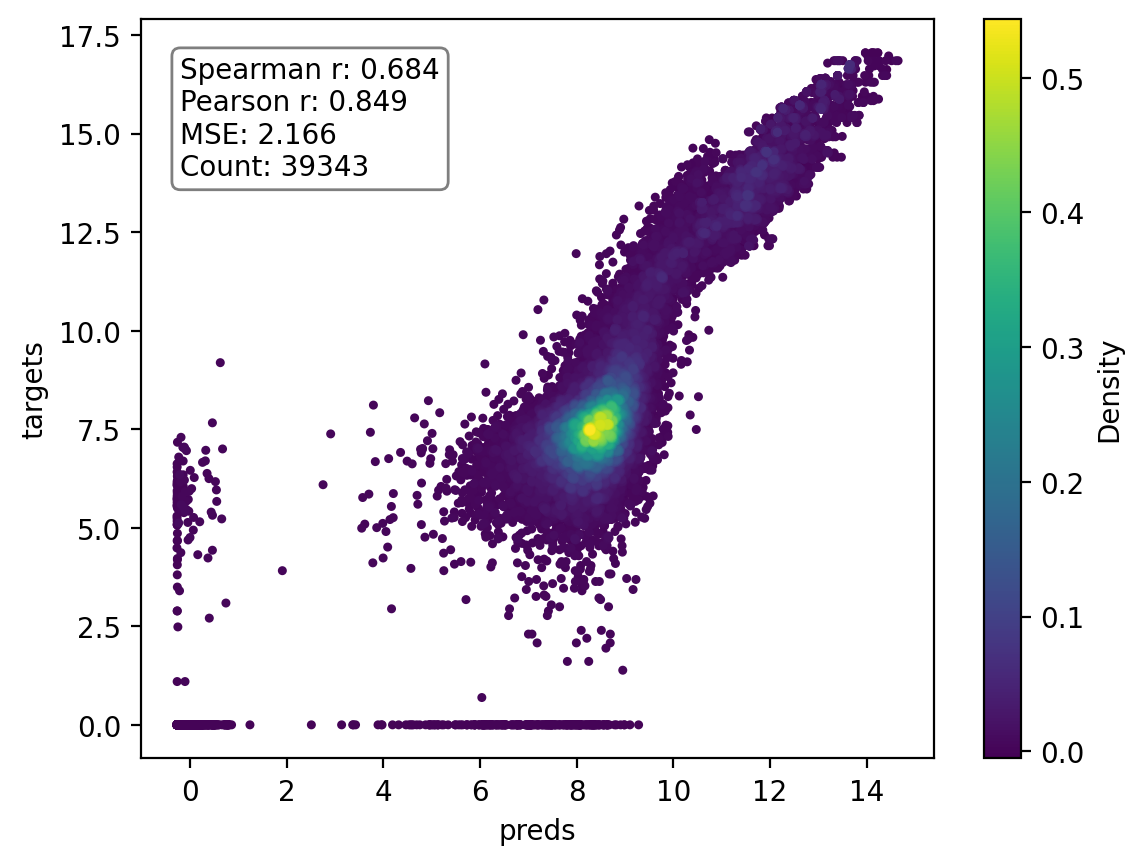

In [10]:
p = "/home/valehvpa/projects/scCisTrans/histobpnet/ap.npy"
ap = np.load(p)

p = "/home/valehvpa/projects/scCisTrans/histobpnet/at.npy"
at = np.load(p)

# scatterplot, ap are predictions, at are targets
# plt.figure(figsize=(8, 6))
# plt.scatter(ap, at, alpha=0.5)
# plt.xlabel("preds")
# plt.ylabel("targets")
# plt.title("Scatter Plot of targets vs preds")
# plt.show()

density_scatter(ap, at, "preds", "targets", s=5, bins=200, incl_stats=True)
# # add a text with: spearmanr, pearsonr, mse, and count
# spearman_corr = scipy.stats.spearmanr(ap, at).correlation
# pearson_corr = scipy.stats.pearsonr(ap, at)[0]
# mse = np.mean((ap - at) ** 2)
# count = ap.shape[0]
# stats_text = f"Spearman r: {spearman_corr:.3f}\nPearson r: {pearson_corr:.3f}\nMSE: {mse:.3f}\nCount: {count}"
# plt.gca().text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
#                fontsize=10, verticalalignment='top',
#                bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.show()